In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the data

In [2]:
from helpers import load_data, preprocess_data

path_dataset = "data/data_train.csv"
ratings = load_data(path_dataset)

number of items: 10000, number of users: 1000


### Plot the data

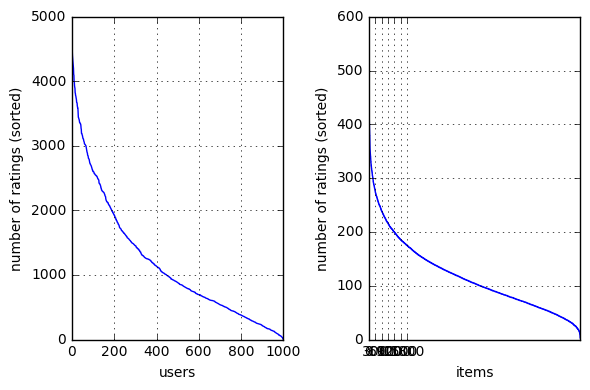

min # of items per user = 8, min # of users per item = 3.


In [3]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

### Plot the histogram of the ratings

Take the ratings and make a list of all values, so it can be fed into the histogram

In [4]:
import itertools
#make a list from an array for making a histogram
merged = list(itertools.chain.from_iterable(ratings.data))
#number of elements in the list
len(merged)

1176952

And now plot the obtained list:

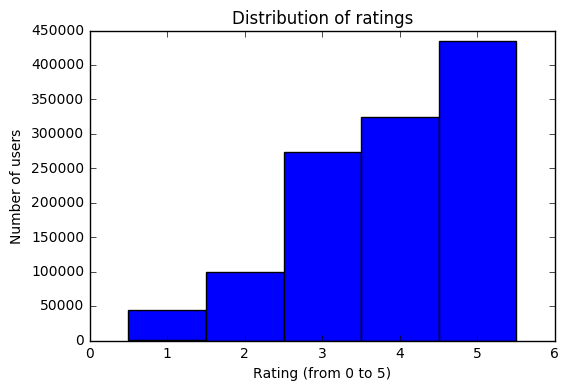

In [5]:
from matplotlib import pyplot as plt
plt.hist(merged, bins = np.arange(0.5, 6.5, 1))
plt.title('Distribution of ratings')
plt.xlabel('Rating (from 0 to 5)')
plt.ylabel('Number of users')

Look like we have more of high ratings and less of lower ones. Let's do a sanity check and count the number of ratings, grouped by the value of ratings - 1 through 5:

In [6]:
#just a check - there are no zero elements
all(item!=0 for item in merged)

True

In [7]:
from itertools import groupby
#need sorted list to use group by function from itertolls
newList = sorted(merged)
print([len(list(j)) for i, j in groupby(newList)])

[43508, 99180, 274327, 324700, 435237]
